In [7]:
import os
from glob import glob
import shutil
import matplotlib.pyplot as plt
import altair as alt
import re
import math
import numpy as np
import pandas as pd
from scipy.stats import chisquare

import ot

from scipy.stats import wasserstein_distance

In [2]:
directory = os.getcwd()
print(directory)

/Users/hbakt/Desktop/code/BB_result_scripts


In [3]:
def kl(P, Q):
    kl = 0
    got_zero = False
    for p,q in zip(P, Q):
        if (p != 0) and (q != 0):
            kl += p * math.log(p/q)
        else:
            got_zero = True
            #
    # if (got_zero):
    #     print(" got zero")
    #     print(ms)
    #     print(other)
    #     print("kl: ", kl)
    return kl


In [4]:
def chi_stat(obs_freq, expected_freq):
    return sum([ ((o-e)**2)/e for o,e in zip(obs_freq, expected_freq) if e>0])

In [34]:
def plot_simulation_vs_experiment(outcomes, ours_probs, IPC_prob, Bullet_prob, experiment_prob, experiment_title,
                                  save = False, save_title = "experiment probs"):
    width = 0.15
    plt.bar(np.array(outcomes)-2*width, ours_probs, width=width,  label = "Ours", color = "orange")
    plt.bar(np.array(outcomes)-width,   Bullet_prob, width=width, label = "Bullet", color = "brown")
    plt.bar(np.array(outcomes)-0.0,     IPC_prob, width=width, label = "IPC", color = "teal")
    plt.bar(np.array(outcomes)+width,   experiment_prob, width=width, label = experiment_title, color = "black")
    plt.title(save_title)
    plt.xlabel("Outcome")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(outcomes)
    plt.tight_layout()
    if save:
        plt.savefig("./experiment_plots/" + save_title + ".png", dpi=800)
    plt.show()

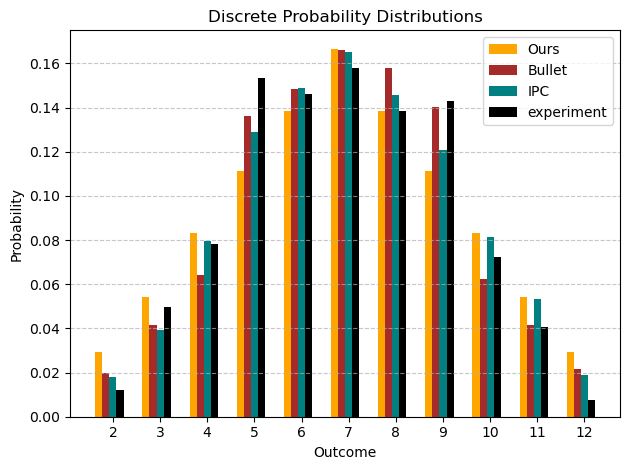

In [25]:


MS_probs     = [0.029, 0.054, 0.083, 0.111, 0.138, 0.166, 0.138, 0.111, 0.083, 0.054, 0.029]
MS_probs = [p/(sum(MS_probs)) for p in MS_probs]
Bullet_probs = [0.019, 0.040, 0.062, 0.131, 0.143, 0.160, 0.152, 0.135, 0.060, 0.040, 0.021]
Bullet_probs = [p/(sum(Bullet_probs)) for p in Bullet_probs]
IPC_probs    = [0.018, 0.039, 0.079, 0.128, 0.148, 0.164, 0.145, 0.120, 0.081, 0.053, 0.019]
IPC_probs = [p/(sum(IPC_probs)) for p in IPC_probs]

# ------ 2d6 trials ------
# observed_freq = [28, 53, 21]
observed_freq_FDM = [2,5,8,40,34,30,31,28,23,4,1]
observed_freq_F170 = [0,8,3,22,27,28,20,19,18,9,0]
observed_freq_SLS = [ 0,13,30,53,34,63,44,54,33,17,1]
observed_freq_SLA = [8,33,52,102,97,105,92,95,48,27,5]

observed_freq = observed_freq_SLA

observed_probs = [p/sum(observed_freq) for p in observed_freq]
m = sum(observed_freq)

theoretical_probs = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

outcomes = [2,3,4,5,6,7,8,9,10,11,12]
plot_simulation_vs_experiment(outcomes, MS_probs, IPC_probs, Bullet_probs, observed_probs, "experiment")

In [39]:
print( " symmetric KL Divergence: KL(P,Q)/2. + KL(Q,P)/2.  ")
print("MS-complex vs observed ", (kl(MS_probs, observed_probs) + kl(observed_probs, MS_probs))/2.)
print("Bullet vs observed ", (kl(Bullet_probs, observed_probs) + kl(observed_probs, Bullet_probs))/2.)
print("IPC vs observed ", (kl(IPC_probs, observed_probs) + kl(observed_probs, IPC_probs))/2.)
print("--------------")
print("MS-complex vs Bullet ", (kl(MS_probs, Bullet_probs) + kl(Bullet_probs, MS_probs))/2.)
print("MS-complex vs IPC ", (kl(MS_probs, IPC_probs) + kl(IPC_probs, MS_probs))/2.)
print("Bullet vs IPC ", (kl(Bullet_probs, IPC_probs) + kl(IPC_probs, Bullet_probs))/2.)


 symmetric KL Divergence: KL(P,Q)/2. + KL(Q,P)/2.  
MS-complex vs observed  0.03635431357059624
Bullet vs observed  0.014904924393803622
IPC vs observed  0.014591566580096062
--------------
MS-complex vs Bullet  0.019113250755325016
MS-complex vs IPC  0.009452538971524625
Bullet vs IPC  0.008077912792285202


In [40]:
# ------ binomial n=2 trials ------
observed_freq = [24, 49, 27]
m = sum(observed_freq)
expected_probs = [1/4,1/2,1/4]

expected_freq = [p * m for p in expected_probs]
chi_squared_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)

print("total samples", sum(observed_freq))
print(f"Chi-squared statistic: {chi_squared_stat:.4f}")
print(f"P-value: {p_value:.4f}")

total samples 100
Chi-squared statistic: 0.2200
P-value: 0.8958


In [23]:
# ------ binomial n=3 trials ------
Bullet_b3_probs = [0.0986715, 0.404706, 0.408439, 0.0873413]
Bullet_b3_probs = [c/sum(Bullet_b3_probs) for c in Bullet_b3_probs]
IPC_b3_probs    = [0.093197, 0.397403, 0.396383, 0.113017]
IPC_b3_probs = [c/sum(IPC_b3_probs) for c in IPC_b3_probs]
Ours_b3_probs = [0.126, 0.3739, 0.3739 , 0.126]
Ours_b3_probs = [p/sum(Ours_b3_probs) for p in Ours_b3_probs]

expected_b3_probs = Ours_b3_probs

observed_b3_freq1 = [1, 47, 49, 8]
observed_b3_freq2 = [43, 138, 117, 31]


observed_b3_freq = observed_b3_freq2
m = sum(observed_b3_freq)
observed_b3_probs = [c/sum(observed_b3_freq) for c in observed_b3_freq]

expected_b3_freq = [p * m for p in expected_b3_probs]

chi_squared_stat, p_value = chisquare(f_obs=observed_b3_freq, f_exp=expected_b3_freq, ddof=0)

print("total samples", sum(observed_b3_freq))
print(f"Chi-squared statistic: {chi_squared_stat:.4f}")
print(f"P-value: {p_value:.4f}")

total samples 329
Chi-squared statistic: 4.8128
P-value: 0.1860


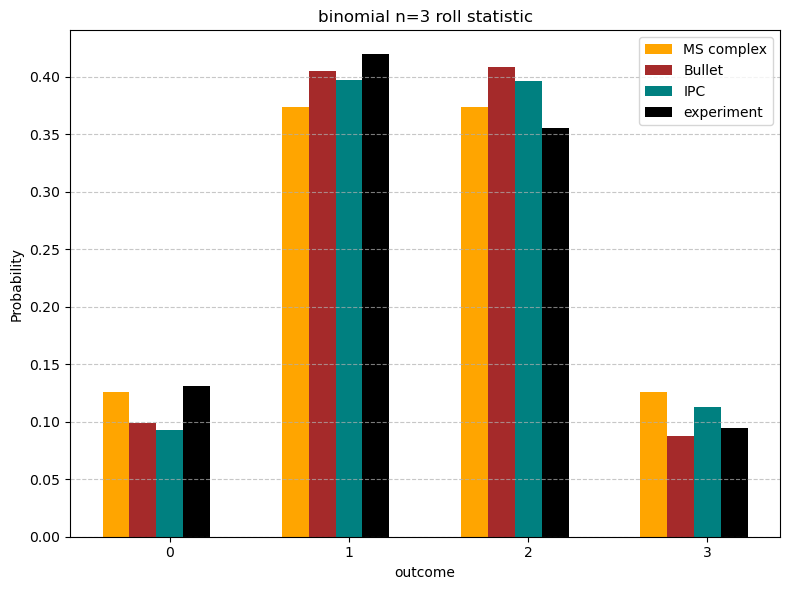

In [24]:
plt.figure(figsize=(8, 6))

# observed_b3_probs = [c/sum(observed_b3_freq) for c in observed_b3_freq]


width = 0.15
# plt.plot(range(2,13),expected_probs, color="yellow", label = "expected")
plt.bar(np.linspace(0,3,4)-2*width, expected_b3_probs, width=width,  label = "MS complex", color = "orange")
plt.bar(np.linspace(0,3,4)-width,   Bullet_b3_probs, width=width, label = "Bullet", color = "brown")
plt.bar(np.linspace(0,3,4)-0.0,     IPC_b3_probs, width=width, label = "IPC", color = "teal")
plt.bar(np.linspace(0,3,4)+width,   observed_b3_probs, width=width, label = "experiment", color = "black")
# plt.bar(np.linspace(2,12,11)+2*width,[e/sum(observed_freq_SLA) for e in observed_freq_SLA], width=width, label = "SLA", color = "green")

plt.title("binomial n=3 roll statistic")
plt.xlabel("outcome")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([0,1,2,3])
# Show the plot
plt.tight_layout()
plt.savefig("barplot b3.png")
plt.show()

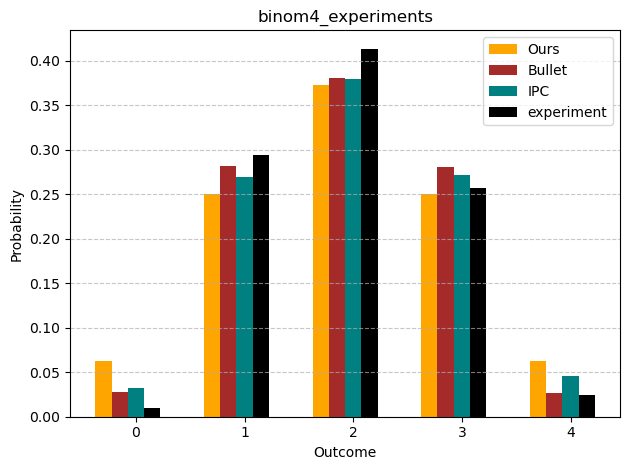

In [35]:
# ------ binomial n=4 trials ------
observed_b4_freq = [4, 119, 167, 104, 10]
observed_b4_prob = [p/sum(observed_b4_freq) for p in observed_b4_freq]

Ours_b4_prob    = [0.063, 0.250, 0.373, 0.25,  0.063]
Bullet_b4_probs = [0.028,  0.282, 0.381, 0.28, 0.027]
IPC_b4_probs    = [0.032,  0.269, 0.379, 0.271,  0.046]

outcomes = [0,1,2,3,4]
plot_simulation_vs_experiment(outcomes, Ours_b4_prob, IPC_b4_probs, Bullet_b4_probs, observed_b4_prob, "experiment",
                              save=True, save_title="binom4_experiments")

total samples 331
Chi-squared statistic: 0.6217
P-value: 0.7328


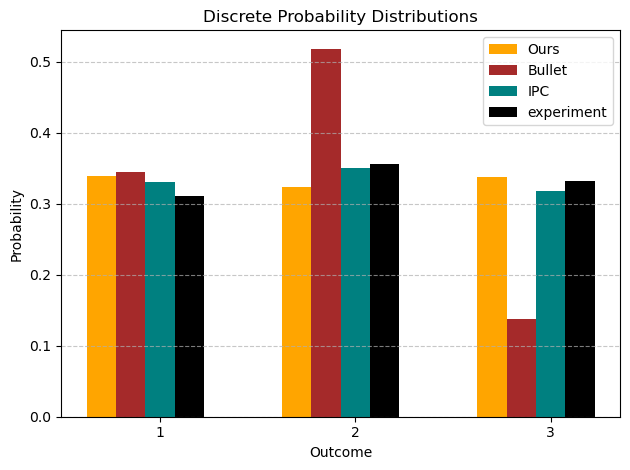

In [29]:
# ------ kitten d3 trials ------
our_d3_probs = [0.32833 + 0.01, 0.29411 + 0.029, 0.2488 + 0.0139 + 0.0745]
our_d3_probs = [p/sum(our_d3_probs) for p in our_d3_probs]
Bullet_d3_probs   = [0.308, 0.46388 , 0.10+0.01+0.013]
Bullet_d3_probs   = [c/sum(Bullet_d3_probs) for c in Bullet_d3_probs]
IPC_d3_probs      = [0.3301, 0.35, 0.04 + 0.145 + 0.1326]
IPC_d3_probs      = [c/sum(IPC_d3_probs) for c in IPC_d3_probs]

# choose null hypothesis
expected_d3_probs = IPC_d3_probs

#
observed_d3_freq = [103, 118, 110]
m = sum(observed_d3_freq)
observed_d3_probs = [c/sum(observed_d3_freq) for c in observed_d3_freq]

expected_d3_freq = [p * m for p in expected_d3_probs]
chi_squared_stat, p_value = chisquare(f_obs=observed_d3_freq, f_exp=expected_d3_freq)

print("total samples", sum(observed_d3_freq))
print(f"Chi-squared statistic: {chi_squared_stat:.4f}")
print(f"P-value: {p_value:.4f}")
outcomes = [1,2,3]
plot_simulation_vs_experiment(outcomes, our_d3_probs, IPC_d3_probs, Bullet_d3_probs, observed_d3_probs, "experiment")

total samples 330
Chi-squared statistic: 0.1627
P-value: 0.9219


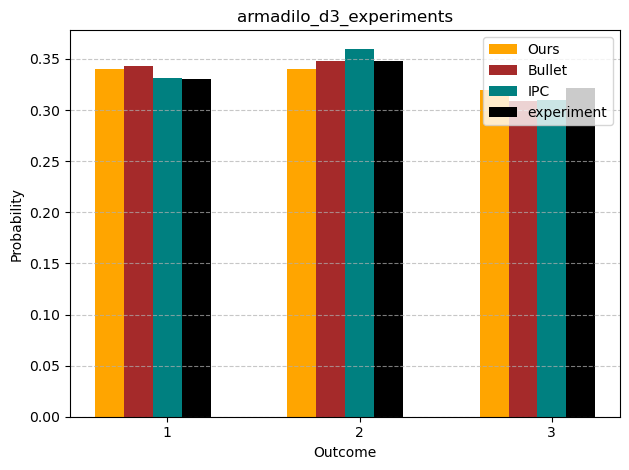

In [37]:
# ------ armadilo d3 trials ------
our_d3_probs = [0.34, 0.34 , 0.32]
our_d3_probs = [p/sum(our_d3_probs) for p in our_d3_probs]
Bullet_d3_probs   = [0.342, 0.347 , 0.308]
Bullet_d3_probs   = [c/sum(Bullet_d3_probs) for c in Bullet_d3_probs]
#processing
IPC_d3_probs      = [0.331,0.36,0.31]
# IPC_d3_probs      = [c/sum(IPC_d3_probs) for c in IPC_d3_probs]

# choose null hypothesis
expected_d3_probs = our_d3_probs

observed_d3_freq1 = [109, 115, 106]
observed_d3_freq = observed_d3_freq1
m = sum(observed_d3_freq)
observed_d3_probs = [c/sum(observed_d3_freq) for c in observed_d3_freq]

expected_d3_freq = [p * m for p in expected_d3_probs]
chi_squared_stat, p_value = chisquare(f_obs=observed_d3_freq, f_exp=expected_d3_freq)

print("total samples", sum(observed_d3_freq))
print(f"Chi-squared statistic: {chi_squared_stat:.4f}")
print(f"P-value: {p_value:.4f}")
outcomes = [1,2,3]
plot_simulation_vs_experiment(outcomes, our_d3_probs, IPC_d3_probs, Bullet_d3_probs, observed_d3_probs, "experiment",
                              save=True, save_title="armadilo_d3_experiments")

In [17]:
data = pd.DataFrame(
    {
        "Bullet": Bullet_d3_probs,
        "IPC":    IPC_d3_probs,
        "Ours":   our_d3_probs,
        "experiment": observed_d3_probs,
    }
)
data = data.sort_values("Ours", ascending=False).reset_index(drop=True)
data["index"] = np.arange(len(data), dtype=int)
data = pd.concat([data])

chart = (
        alt.Chart(data)
        .mark_bar()
        .encode(
            x=alt.X("value:Q").title(None).scale(domain=[0, 1]),
            y=alt.Y("variable:N")
            .title(None)
            .axis(labelColor="gray", labelPadding=2, labelLimit=30, ticks=False, domain=False),
            color=alt.Color("index:N").legend(None),
        )
        .transform_fold(
            ["Bullet", "IPC", "Ours", "experiments"],
            as_=["variable", "value"],
        )
        .properties(
            width=150,
            height=40,  # title=f"Model {model_name} - part {basename}"
        )
        .facet(
            row=alt.Row("model:N")
            .header(
                # labelOrient="top",
                labelAngle=0,
                labelAlign="right",
                #labelAnchor="end",
                labelColor="gray",
                labelFontSize=16,
                labelPadding=0,
                titlePadding=0,
                #labelLimit=50,
                #labelFontWeight="bold",
            )
            .title(None),
            column=alt.Column("part:N")
            .header(
                # labelOrient="top",
                labelAnchor="end",
                labelColor="gray",
                labelFontSize=12,
                labelPadding=0,
            )
            .title(None),
            spacing=5,
        )
        .configure_title(fontSize=12, anchor="end", color="gray")
    )
chart.save("experiment_plots/exp_result_output.html")